# Module 2 Project

## Questions

The significance will be defined as the probability that the mean of a given sample will meet the Ho criteria less than 5% of the time. i.e. alpha value will be set at 0.05

### Question 1

Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

    Ho: mean_quantity_undiscounted = mean_quantity_discounted
    
    Ha (1-tailed): mean_quantity_undiscounted > mean_quantity_discounted

**Conclusion**
For all discount levels the null hypothesis can be rejected (both T-Values and P-Values exceed the pre-defined thresholds), a discount does increase the order quantity.

### Question 2

Does the holiday period (defined as November and December) has a statistically significant negative impact on the number of orders placed?

    Ho: mean_order_quantity_holidays = mean_order_quantity_restyear

    Ha (1-tailed): mean_order_quantity_holidays < mean_order_quantity_restyear

**Conclusion**
As can be seen from the histogram of orders by month the two months in question (Nov & Dec) span the mean number of monthly orders - a clear indicator that the holiday period is does not depress the order quantity with one month being above average and one being below. When considering the significance of this effect the P-Value for months is substantially greater than the significance value alpha (0.05) which indicates that this result is not significant in the dataset. When considering the t-statistic, both are below the t-critical value with the December t-statistic being negative indicating (as can be clearly seen in the histogram) that the hypothesis is not only insignificant but incorrect.

Therefore the Ha is rejected and the Ho accepted indicating that there is no significant correlation between the holidays and order quantities.

### Question 3

Do lower priced items have statistically significant higher order volumes?

    Ho: mean_order_quantity_low_price = mean_order_quantity_high_price

    Ha (1-tailed): mean_order_quantity_low_price > mean_order_quantity_high_price

**Conclusion**
The T-Value is greater than the T-Critical Value and the P value is less than alpha (0.05) therefore the Null Hypothesis (Ho) can be rejected and the alternative Ha accepted; lower priced items do have higher sales volumes.

### Question 4

Does mean order quantity vary by region by a statistically significant amount?

    Ho: mean_order_size = average_mean_order_size_by region 

    Ha(2-tailed): mean_order_size = average_mean_order_size_by region

**Conclusion**
All areas but the British Isles and Northern Europe exceed the thresholds for P-Value (alpha =0.05) and T-Value (greater than T-Critical). As a result the null hypothesis is rejected and the alternative it is accepted as true that the average order size does vary by region for the significance values specified.

### Question 5

Does increasing order quantity have a statistically significant correlation with increasing freight cost?

    Ho: large_quantity_freight_cost = small_quantity_freight_cost
    
    Ha(1-tailed): large_quantity_freight_cost > small_quantity_freight_cost
   
**Conclusion**
Both the T-Value and the P-Value are substantially above/below the thresholds set for confirming significance. The T-Value exceeds the T-Crtical Value and the P-Value is below the Alpha value of 0.05. Therefore it can be confirmed that the order quantity does have a correlation with the freight cost.

# Notebook Setup

In [ ]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import datetime

In [3]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy import stats
import datetime
import seaborn as sns

The dataset is held in a sqlite database; therefore the first task is to connect to the database. Once connected data will be imported and stored as Pandas Dataframes.

In [4]:
connection = sqlite3.connect('Northwind_small.sqlite') 
cur = connection.cursor()

It is important to check whether the Schema is accurate or not; to do this the table names will be request from the database directly.

In [5]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('Employee',), ('Category',), ('Customer',), ('Shipper',), ('Supplier',), ('Order',), ('Product',), ('OrderDetail',), ('CustomerCustomerDemo',), ('CustomerDemographic',), ('Region',), ('Territory',), ('EmployeeTerritory',)]


It is clear that there are some errors in the schema largely relating to pluralisation of the table names

# Question 1

## Obtain

This question primarily concerns itself with the size of the order and the discount being offered. This information is held within the table "Order Detail"

In [6]:
df_order_detail = pd.DataFrame(cur.execute("""SELECT * FROM OrderDetail""").fetchall())

In [7]:
df_order_detail.columns = list(map(lambda x: x[0], cur.description))

In [8]:
df_order_detail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


## Scrub

Initial scrubbing of the data set will be identify any values in the dataset which are NaN / placeholder /incorrect etc. Firstly this will be done only to the Quantity and Discount columns as these are the primary concern.

In [9]:
df_order_detail['Quantity'].value_counts()

20     252
30     194
10     181
15     169
40     113
12      92
6       87
25      80
50      75
35      71
5       67
24      58
60      58
4       55
2       52
21      50
8       50
18      47
3       46
14      36
16      35
9       30
28      29
70      28
7       23
36      21
42      19
1       17
80      16
45      14
100     10
55       9
120      8
65       8
49       7
48       5
32       5
44       4
90       4
13       3
77       3
110      3
56       3
84       2
11       2
27       2
33       2
39       2
130      2
63       1
66       1
22       1
52       1
54       1
91       1
Name: Quantity, dtype: int64

In [10]:
df_order_detail['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [11]:
len(df_order_detail['Discount']) == len(df_order_detail['Quantity'])

True

Both of these datasets appear to be complete with no NaN, obvious placeholders or incorrect values

## Explore

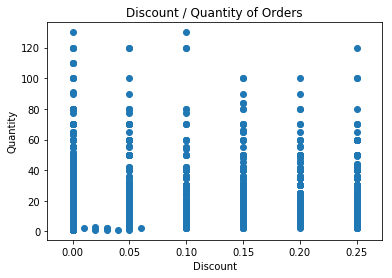

In [12]:
#Probably delete
plt.scatter(df_order_detail['Discount'], df_order_detail['Quantity'])
plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.title('Discount / Quantity of Orders')
plt.show()


In [13]:
df_discount_0 = df_order_detail.loc[df_order_detail['Discount'] == 0]
df_discount_not0 = df_order_detail.loc[df_order_detail['Discount'] != 0]

All data
Mean quantity: 23.81   Variance: 361.67
When discount = 0
Mean quantity: 21.72   Variance: 306.28
When discount > 0
Mean quantity: 27.11   Variance: 430.94


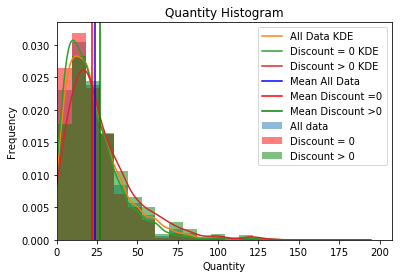

In [14]:
print('All data')
print('Mean quantity: '+ str(round(np.mean(df_order_detail['Quantity']),2))+ '   Variance: ' + str(round(np.var(df_order_detail['Quantity']),2)))
print('When discount = 0')
print('Mean quantity: '+ str(round(np.mean(df_discount_0['Quantity']),2))+ '   Variance: ' + str(round(np.var(df_discount_0['Quantity']),2)))
print('When discount > 0')
print('Mean quantity: '+ str(round(np.mean(df_discount_not0['Quantity']),2))+ '   Variance: ' + str(round(np.var(df_discount_not0['Quantity']),2)))
plt.hist(df_order_detail['Quantity'], alpha=0.5, bins=15, label='All data', density=True)
plt.hist(df_discount_0['Quantity'], alpha=0.5, bins=15, color='red', label='Discount = 0', density=True)
plt.hist(df_discount_not0['Quantity'], alpha=0.5, bins=15, color='green', label='Discount > 0', density=True)
df_order_detail['Quantity'].plot.kde(label='All Data KDE')
df_discount_0['Quantity'].plot.kde(label='Discount = 0 KDE')
df_discount_not0['Quantity'].plot.kde(label='Discount > 0 KDE')
plt.axvline(np.mean(df_order_detail['Quantity']), color='blue', label='Mean All Data')
plt.axvline(np.mean(df_discount_0['Quantity']), color='red', label='Mean Discount =0')
plt.axvline(np.mean(df_discount_not0['Quantity']), color='green', label='Mean Discount >0')
plt.xlim(0)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantity Histogram')
plt.legend()
plt.show()

When considering the effect of the size of the discount on the order quantity the 5 most common discount quantities will be used.

All data
Mean quantity: 23.81   Variance: 361.67
Discount:0
Mean quantity: 21.72   Variance: 306.28
Discount:0.05
Mean quantity: 28.01   Variance: 489.63
Discount:0.1
Mean quantity: 25.24   Variance: 446.27
Discount:0.15
Mean quantity: 28.38   Variance: 434.99
Discount:0.2
Mean quantity: 27.02   Variance: 352.47
Discount:0.25
Mean quantity: 28.24   Variance: 402.21


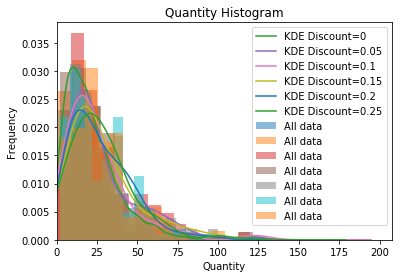

In [15]:
discounts = [0,0.05,0.10,0.15,0.20,0.25]
mean_quantity = []
print('All data')
print('Mean quantity: '+ str(round(np.mean(df_order_detail['Quantity']),2))+ '   Variance: ' + str(round(np.var(df_order_detail['Quantity']),2)))
plt.hist(df_order_detail['Quantity'], alpha=0.5, bins=15, label='All data', density=True)
for i in discounts:
    temp = df_order_detail.loc[df_order_detail['Discount'] == i]
    print('Discount:' + str(i))
    print('Mean quantity: '+ str(round(np.mean(temp['Quantity']),2))+ '   Variance: ' + str(round(np.var(temp['Quantity']),2)))
    plt.hist(temp['Quantity'], alpha=0.5, bins=15, label='All data', density=True)
    temp['Quantity'].plot.kde(label=('KDE Discount='+str(i)))
    mean_quantity.append(round(np.mean(temp['Quantity']),2))

plt.xlim(0)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantity Histogram')
plt.legend()
plt.show()

Plotting the mean quantity against the discount shows a postive, relatively linear relationship. Which would seem to indicate that the null hypothesis can be rejected.

## Model

To confirm rejection of the null hypothesis the t-values and p-values for each discount levels will be calculated.

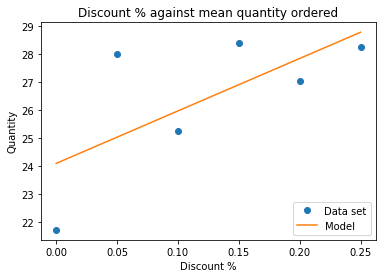

In [51]:
from numpy.polynomial.polynomial import polyfit 

x = np.array(discounts) 
y = np.array(mean_quantity) 
# Fit with polyfit function to get m(intercept) and b(slope) . the degree parameter = 1 to show astraight line 
b, m = polyfit(x, y, 1) 
# Plot the data points and line calculated from ployfit 
plt.plot(x, y, 'o', label='Data set') 
plt.plot(x, b + (m * x), '-', label='Model') 
plt.xticks(x) 
plt.xlabel('Discount %')
plt.ylabel('Quantity')
plt.title('Discount % against mean quantity ordered')
plt.legend()
plt.show()

## Interpret

In [17]:
t_values = []
p_values = []
for i in discounts[1:6]:
    results = ttest_ind(df_order_detail.loc[df_order_detail['Discount'] == i]['Quantity'],df_discount_0['Quantity'])
    t_values.append((i, results[0]))
    p_values.append((i, round(results[1]/2, 8)))

In [18]:
p_values

[(0.05, 5.32e-06),
 (0.1, 0.0077503),
 (0.15, 5.51e-06),
 (0.2, 0.00016316),
 (0.25, 8.9e-06)]

All of the p-values are smaller than confidence level alpha (0.05) therefore the Ho (Null Hypothesis) can be rejected.

In [19]:
t_values

[(0.05, 4.418557901446638),
 (0.1, 2.423258752228738),
 (0.15, 4.411192556207304),
 (0.2, 3.6019486047561884),
 (0.25, 4.304937285665697)]

In [20]:
t.ppf(1-0.05, df=len(df_order_detail)-1)

1.6455613468643528

All of the t-values are greater than the T-Critical value therefore the Ho (Null Hypothesis) can be rejected.

### Conclusions


# Question 2

## Obtain

In [32]:
df_order = pd.DataFrame(cur.execute("""SELECT OrderDate FROM [Order]""").fetchall())
names = list(map(lambda x: x[0], cur.description))
df_order.columns = names

## Scrub

In [33]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 1 columns):
OrderDate    830 non-null object
dtypes: object(1)
memory usage: 6.6+ KB


In [34]:
df_order.head()

,OrderDate
0,2012-07-04
1,2012-07-05
2,2012-07-08
3,2012-07-08
4,2012-07-09


In [36]:
df_order["OrderDate"] = df_order["OrderDate"].astype("datetime64")

In [29]:
sum(df_order["OrderDate"].isna())

0

## Explore

In [41]:
monthly_mean = np.mean(orders_by_month)
monthly_std = np.std(orders_by_month)
x = range(0,150)

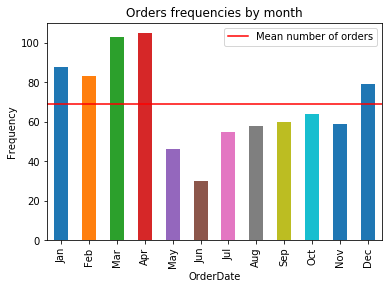

In [45]:
x_names = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_order["OrderDate"].groupby(df_order["OrderDate"].dt.month).count().plot(kind="bar", label='_nolegend_')
plt.ylabel('Frequency')
plt.title('Orders frequencies by month')
plt.xticks(range(0,12), x_names)
plt.axhline(monthly_mean, color='red', label='Mean number of orders')
plt.legend()
plt.show()

In [26]:
orders_by_month=[]
for i in range(1,13):
    temp = len(df_order["OrderDate"].dt.month.loc[(df_order["OrderDate"].dt.month == i)])
    orders_by_month.append(temp)

In [27]:
print(orders_by_month)

[88, 83, 103, 105, 46, 30, 55, 58, 60, 64, 59, 79]


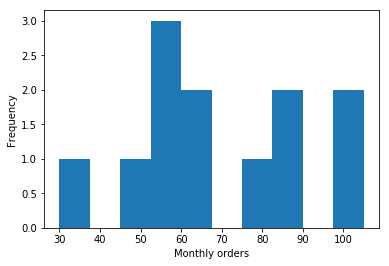

In [28]:
plt.hist(orders_by_month)
plt.xlabel('Monthly orders')
plt.ylabel('Frequency')
plt.show()

Plotting a histogram of the orders by month is not particuarly useful for such a small dataset. As a result creating a Probability Density Function (PDF) is a far more useful indicator of whether the variance in orders is significant. 

## Model

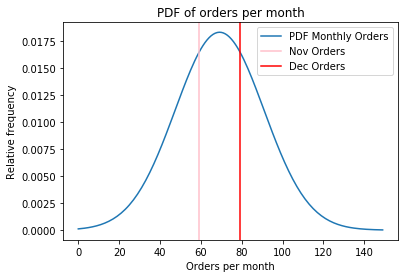

In [29]:
plt.plot(x, stats.norm.pdf(x, monthly_mean, monthly_std), label='PDF Monthly Orders')
plt.axvline(orders_by_month[10], color='pink', label='Nov Orders')
plt.axvline(orders_by_month[11], color='red', label='Dec Orders')
plt.xlabel('Orders per month')
plt.ylabel('Relative frequency')
plt.title('PDF of orders per month')
plt.legend()
plt.show()

## Interpret

In [47]:
monthly_results_nov = stats.ttest_1samp(orders_by_month, orders_by_month[10])
monthly_results_dec = stats.ttest_1samp(orders_by_month, orders_by_month[11])
print('T-Statistic November: ' +str(round(monthly_results_nov[0],4)))
print(' P-Value November: ' + str(round(monthly_results_nov[1],4)))
print('T-Statistic December: ' +str(round(monthly_results_dec[0],4)))
print(' P-Value December: ' + str(round(monthly_results_dec[1],4)))

T-Statistic November: 1.5496
 P-Value November: 0.1495
T-Statistic December: -1.4988
 P-Value December: 0.1621


In [31]:
print('T-Critical: ' +str(round(t.ppf(1-0.05, df=len(orders_by_month)-1),4)))

T-Critical: 1.7959


### Conclusion

As can be seen from the PDF plot of orders by month the two months in question (Nov & Dec) span the mean number of monthly orders - a clear indicator that the holiday period is does not depress the order quantity with one month being above average and one being below. When considering the significance of this effect the P-Value for months is substantially greater than the significance value alpha (0.05) which indicates that this result is not significant in the dataset. When considering the t-statistic, both are below the t-critical value with the December t-statistic being negative indicating (as can be clearly seen in the histogram) that the hypothesis is not only insignificant but incorrect.

Therefore the Ha is rejected and the Ho accepted indicating that there is no significant correlation between the holidays and order quantities.

# Question 3

## Obtain & Scrub

The data required to answer question 3 is from the same table as question 1; so can reuse the df from question 1

In [32]:
df_order_detail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


## Explore

In considering the question the key initial decision is defining low and high. Initially the mean of the dataset will be used to split.

In [39]:
mean_price = np.mean(df_order_detail['UnitPrice'])
low_price = df_order_detail.loc[df_order_detail['UnitPrice'] < mean_price]
high_price = df_order_detail.loc[df_order_detail['UnitPrice'] > mean_price]

## Model

All data
Mean quantity: 23.81   Variance: 361.67
Low Price
Mean quantity: 21.72   Variance: 306.28
High Price
Mean quantity: 27.11   Variance: 430.94


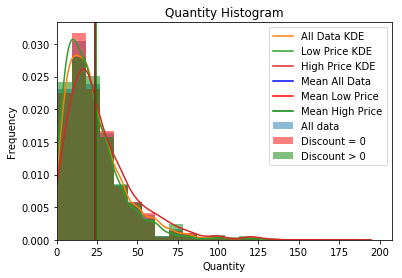

In [40]:
print('All data')
print('Mean quantity: '+ str(round(np.mean(df_order_detail['Quantity']),2))+ '   Variance: ' + str(round(np.var(df_order_detail['Quantity']),2)))
print('Low Price')
print('Mean quantity: '+ str(round(np.mean(df_discount_0['Quantity']),2))+ '   Variance: ' + str(round(np.var(df_discount_0['Quantity']),2)))
print('High Price')
print('Mean quantity: '+ str(round(np.mean(df_discount_not0['Quantity']),2))+ '   Variance: ' + str(round(np.var(df_discount_not0['Quantity']),2)))
plt.hist(df_order_detail['Quantity'], alpha=0.5, bins=15, label='All data', density=True)
plt.hist(low_price['Quantity'], alpha=0.5, bins=15, color='red', label='Discount = 0', density=True)
plt.hist(high_price['Quantity'], alpha=0.5, bins=15, color='green', label='Discount > 0', density=True)
df_order_detail['Quantity'].plot.kde(label='All Data KDE')
df_discount_0['Quantity'].plot.kde(label='Low Price KDE')
df_discount_not0['Quantity'].plot.kde(label='High Price KDE')
plt.axvline(np.mean(df_order_detail['Quantity']), color='blue', label='Mean All Data')
plt.axvline(np.mean(low_price['Quantity']), color='red', label='Mean Low Price')
plt.axvline(np.mean(high_price['Quantity']), color='green', label='Mean High Price')
plt.xlim(0)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Quantity Histogram')
plt.legend()
plt.show()

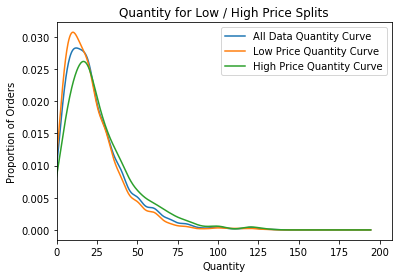

In [41]:
df_order_detail['Quantity'].plot.kde(label='All Data Quantity Curve')
df_discount_0['Quantity'].plot.kde(label='Low Price Quantity Curve')
df_discount_not0['Quantity'].plot.kde(label='High Price Quantity Curve')
plt.xlim(0)
plt.xlabel('Quantity')
plt.ylabel('Proportion of Orders')
plt.title('Quantity for Low / High Price Splits')
plt.legend()
plt.show()

## Interpret

In [42]:
results = ttest_ind(low_price['Quantity'],df_discount_0['Quantity'])
t_values_price_quantity = results[0]
p_values_price_quantity = round(results[1]/2, 8)
print('T Value: ' + str(t_values_price_quantity))
print('P Value: ' + str(p_values_price_quantity))

T Value: 2.689162973045262
P Value: 0.00360318


In [43]:
print('T-Critical: ' + str(t.ppf(1-0.05, df=len(df_order_detail)-1)))

T-Critical: 1.6455613468643528


The T-Value is greater than the T-Critical Value and the P value is less than alpha (0.05) therefore the Null Hypothesis can be rejected in both cases.

# Question 4

Does mean order quantity vary by region?

Ho: mean_order_size = average_mean_order_size_by region   Ha(two-tailed): mean_order_size = average_mean_order_size_by region

## Obtain & Scrub

The required data is contained between the Order and OrderDetail tables, this will be compliled into a single dataframe using an inner join.

In [44]:
df_order_region = pd.DataFrame(cur.execute("""select ShipRegion, Quantity from [Order] JOIN OrderDetail on [Order].Id = OrderDetail.OrderId""").fetchall())
df_order_region.columns = [i[0] for i in cur.description]
df_order_region.head()

,ShipRegion,Quantity
0,Western Europe,12
1,Western Europe,10
2,Western Europe,5
3,Western Europe,9
4,Western Europe,40


In [45]:
df_order_region['ShipRegion'].value_counts()

Western Europe     745
North America      427
South America      355
British Isles      190
Northern Europe    143
Southern Europe    137
Central America     72
Scandinavia         70
Eastern Europe      16
Name: ShipRegion, dtype: int64

In [46]:
df_order_region['Quantity'].value_counts()

20     252
30     194
10     181
15     169
40     113
12      92
6       87
25      80
50      75
35      71
5       67
24      58
60      58
4       55
2       52
21      50
8       50
18      47
3       46
14      36
16      35
9       30
28      29
70      28
7       23
36      21
42      19
1       17
80      16
45      14
100     10
55       9
120      8
65       8
49       7
48       5
32       5
44       4
90       4
13       3
77       3
110      3
56       3
84       2
11       2
27       2
33       2
39       2
130      2
63       1
66       1
22       1
52       1
54       1
91       1
Name: Quantity, dtype: int64

Neither of the key datasets have any NaN, 0 or obvious placeholder values.

## Explore

Initially some basic parameters such as the mean of the dataset will be established and a histogram plotted.

In [47]:
print('Mean order quantity: ' +str(round(df_order_region['Quantity'].mean(),2)))

Mean order quantity: 23.81


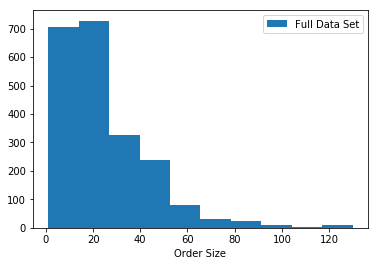

In [48]:
plt.hist(df_order_region['Quantity'], label='Full Data Set')
plt.xlabel('Order Size')
plt.legend()
plt.show()

The histogram shows that the data is positively skewed, with some outliers. Next the mean for each of the parameters will be established a plot of the full data set with overlaid a kde plot and the mean order size of the various regions.

In [49]:
df_quantity_region = df_order_region.groupby(["ShipRegion"]).mean()
df_quantity_region

,Quantity
ShipRegion,
British Isles,23.294737
Central America,14.236111
Eastern Europe,12.812500
North America,26.496487
Northern Europe,23.811189
Scandinavia,14.942857
South America,21.188732
Southern Europe,15.131387
Western Europe,27.249664


C:\Users\chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


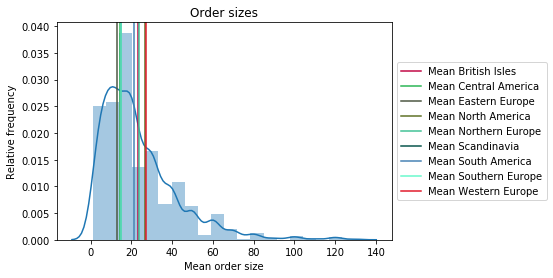

In [50]:
sns.distplot(df_order_region['Quantity'], bins=20)
for i in range(len(df_quantity_region)):
    plt.axvline(df_quantity_region['Quantity'][i], color=np.random.rand(3,), label='Mean '+df_quantity_region['Quantity'].keys()[i])
plt.xlabel('Mean order size')
plt.ylabel('Relative frequency')
plt.title('Order sizes')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Model

To evaluate the hypothesis the P-Value and the T-Value will be calculated, and then compared against Alpha and T_Critical

In [51]:
region_t_value = []
region_p_value = []
for i in range(len(df_quantity_region['Quantity'])):
    temp = stats.ttest_1samp(df_order_region['Quantity'], df_quantity_region['Quantity'][i])
    region_t_value.append(round(temp[0],3))
    region_p_value.append(round(temp[1],4))


In [52]:
df_quantity_region['Quantity']

ShipRegion
British Isles      23.294737
Central America    14.236111
Eastern Europe     12.812500
North America      26.496487
Northern Europe    23.811189
Scandinavia        14.942857
South America      21.188732
Southern Europe    15.131387
Western Europe     27.249664
Name: Quantity, dtype: float64

In [53]:
region_results = pd.DataFrame({'Mean': round(df_quantity_region['Quantity'],2), 'T-Value': region_t_value, 'P-Value': region_p_value})
region_results

,Mean,T-Value,P-Value
ShipRegion,,,
British Isles,23.29,1.265,0.2061
Central America,14.24,23.372,0.0000
Eastern Europe,12.81,26.846,0.0000
North America,26.50,-6.549,0.0000
Northern Europe,23.81,0.004,0.9965
Scandinavia,14.94,21.647,0.0000
South America,21.19,6.404,0.0000
Southern Europe,15.13,21.187,0.0000
Western Europe,27.25,-8.387,0.0000


In [54]:
region_results.sort_values('Mean')

,Mean,T-Value,P-Value
ShipRegion,,,
Eastern Europe,12.81,26.846,0.0000
Central America,14.24,23.372,0.0000
Scandinavia,14.94,21.647,0.0000
Southern Europe,15.13,21.187,0.0000
South America,21.19,6.404,0.0000
British Isles,23.29,1.265,0.2061
Northern Europe,23.81,0.004,0.9965
North America,26.50,-6.549,0.0000
Western Europe,27.25,-8.387,0.0000


In [55]:
print('T-Critical: ' + str(t.ppf(1-0.05, df=len(df_order_region)-1)))

T-Critical: 1.6455613468643528


#### Conclusion

For all areas but the British Isles and Northern Europe exceeding the thresholds for P-Value (alpha =0.05) and T-Values exceeding the T-Critical value it is true that the average order size does vary by region for the significance values specified. 

# Question 5

In [56]:
Does increasing order size increase freight cost?
Ho: large_quantity_freight_cost = small_quantity_freight_cost Ha(one-tailed): large_quantity_freight_cost > small_quantity_freight_cost

SyntaxError: invalid syntax (<ipython-input-56-b2531ea0126d>, line 2)

## Obtain & Scrub

In [57]:
df_freight_quantity = pd.DataFrame(cur.execute("""select Freight, Quantity from [Order] JOIN OrderDetail on [Order].Id = OrderDetail.OrderId""").fetchall())
df_freight_quantity.columns = [i[0] for i in cur.description]
df_freight_quantity.head()

,Freight,Quantity
0,32.38,12
1,32.38,10
2,32.38,5
3,11.61,9
4,11.61,40


Before using the dataset some prelimary analaysis will be used to identify any issues with the dataset - looking for NaN, errors, placeholders etc.

In [58]:
df_freight_quantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
Freight     2155 non-null float64
Quantity    2155 non-null int64
dtypes: float64(1), int64(1)
memory usage: 33.8 KB


In [59]:
df_freight_quantity.columns[1]

'Quantity'

In [60]:
for i in df_freight_quantity.columns:
    print('Number of NaN ' + i + ' : ' +str(sum(df_freight_quantity[i].isna())))

Number of NaN Freight : 0
Number of NaN Quantity : 0


In [61]:
for i in df_freight_quantity.columns:
    print(df_freight_quantity[i].value_counts())

8.53      25
3.52       6
53.05      6
352.69     6
487.57     6
17.55      6
36.71      6
353.07     6
44.12      6
4.99       5
411.88     5
108.26     5
227.22     5
94.77      5
200.24     5
149.49     5
212.98     5
30.34      5
77.78      5
24.49      5
14.93      5
147.06     5
203.48     5
6.27       5
252.49     5
97.18      5
72.97      5
76.07      5
147.26     5
810.05     5
          ..
5.44       1
25.22      1
2.38       1
3.77       1
193.37     1
34.82      1
46.69      1
42.74      1
14.62      1
2.84       1
1.96       1
6.54       1
7.13       1
30.36      1
11.92      1
2.70       1
23.60      1
1.10       1
69.19      1
43.30      1
1.28       1
18.53      1
15.51      1
10.19      1
4.40       1
2.91       1
29.98      1
8.63       1
121.82     1
37.52      1
Name: Freight, Length: 799, dtype: int64
20     252
30     194
10     181
15     169
40     113
12      92
6       87
25      80
50      75
35      71
5       67
24      58
60      58
4       55
2       52
2

There are no NaN, no clear errors and no clear placeholder values

## Explore

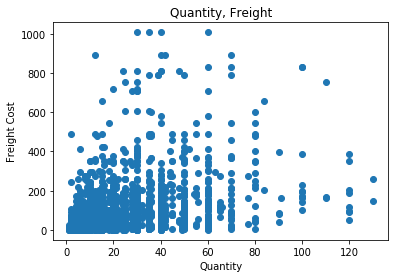

In [62]:
plt.scatter(df_freight_quantity['Quantity'], df_freight_quantity['Freight'])
plt.xlabel('Quantity')
plt.ylabel('Freight Cost')
plt.title('Quantity, Freight')
plt.show()

There appears to be a trend of increasing freight costs with increasing order quantities, there are high levels of heteroscedasticity.

## Model

A comparison of small vs. large quantities and the freight cost will be completed by simplistically taking the mean value as the split between small and large.

In [63]:
mean_quantity = np.mean(df_freight_quantity['Quantity'])
mean_freight = np.mean(df_freight_quantity['Freight'])
small_quantity = df_freight_quantity.loc[df_freight_quantity['Quantity'] < mean_quantity]
large_quantity = df_freight_quantity.loc[df_freight_quantity['Quantity'] >= mean_quantity]
small_mean = np.mean(small_quantity)
large_mean = np.mean(large_quantity)

All Orders Mean Freight Cost: 96.2
Small Quantity Mean Freight Cost: 62.16
Large Quantity Mean Freight Cost: 147.45


C:\Users\chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


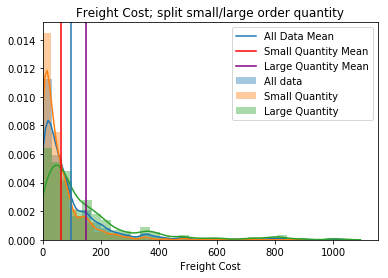

In [64]:
print('All Orders Mean Freight Cost: ' + str(round(mean_freight,2)))
print('Small Quantity Mean Freight Cost: ' + str(round(small_mean[0],2)))
print('Large Quantity Mean Freight Cost: ' + str(round(large_mean[0],2)))
sns.distplot(df_freight_quantity['Freight'], norm_hist=True, bins=30, label='All data')
sns.distplot(small_quantity['Freight'], norm_hist=True, bins=30, label='Small Quantity')
sns.distplot(large_quantity['Freight'], norm_hist=True, bins=30, label='Large Quantity')
plt.axvline(mean_freight, label='All Data Mean')
plt.axvline(small_mean['Freight'], color = 'red', label='Small Quantity Mean')
plt.axvline(large_mean['Freight'], color = 'purple', label='Large Quantity Mean')
plt.xlabel('Freight Cost')
plt.xlim(0)
plt.title('Freight Cost; split small/large order quantity')
plt.legend()
plt.show()


It can be seen from the plot and mean values that there is an increase in the cost of Freight when there is an increase in order quantity. To quantitify the extent of this effect the T-Value and the P-Value will be calculated.

Establishing the size effect one of the simplest solutions is a freight cost per item.

Mean freight cost per item: 5.362
Std Dev freight cost per item: 9.039


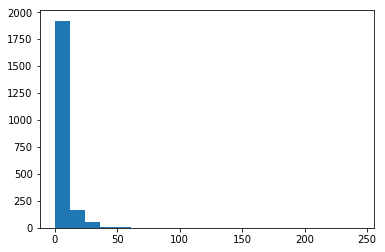

In [74]:
df_freight_item = df_freight_quantity['Freight']/df_freight_quantity['Quantity']
print('Mean freight cost per item: '+str(round(df_freight_item.mean(),3)))
print('Std Dev freight cost per item: '+str(round(df_freight_item.std(),3)))
plt.hist(df_freight_item, bins=20)
plt.show()

## Interpret

In [314]:
results = stats.ttest_ind(large_quantity['Freight'],small_quantity['Freight'])
t_values_price_quantity = results[0]
p_values_price_quantity = round(results[1]/2, 8)
print('T Value: ' + str(t_values_price_quantity))
print('P Value: ' + str(p_values_price_quantity))

T Value: 15.351397807300273
P Value: 0.0


In [313]:
print('T-Critical: ' + str(round(t.ppf(1-0.05, df=len(df_freight_quantity)-1),3)))

T-Critical: 1.646


### Conclusion

Both the T-Value and the P-Value are substantially above/below the thresholds set for confirming significance. The T-Value exceeds the T-Crtical Value and the P-Value is below the Alpha value of 0.05.